In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pylab, pyplot
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)
plt.style.use("seaborn")
pd.set_option('display.max_rows', 600)
plt.rcParams.update({'font.family':'Times New Roman'})
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')

# Sklearn Libraries
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# XGBoost, CatBoost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Skopt
import skopt
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

In [2]:
df = pd.read_excel("Carius.xlsx")

In [3]:
df

,pH,PPM,Loading,Time,Degredation
0,2,30,0.5,30,0.2000
1,2,30,0.5,60,0.4630
2,2,30,0.5,90,0.5890
3,2,30,0.5,120,0.6630
4,2,30,0.5,150,0.7200
5,2,30,1.0,30,0.4000
6,2,30,1.0,60,0.5710
7,2,30,1.0,90,0.6710
8,2,30,1.0,120,0.7280
9,2,30,1.0,150,0.8140


In [4]:
df.columns

Index(['pH', 'PPM', 'Loading', 'Time', 'Degredation'], dtype='object')

In [5]:
df = df[['pH', 'PPM', 'Loading', 'Time', 'Degredation']]

In [6]:
df

,pH,PPM,Loading,Time,Degredation
0,2,30,0.5,30,0.2000
1,2,30,0.5,60,0.4630
2,2,30,0.5,90,0.5890
3,2,30,0.5,120,0.6630
4,2,30,0.5,150,0.7200
5,2,30,1.0,30,0.4000
6,2,30,1.0,60,0.5710
7,2,30,1.0,90,0.6710
8,2,30,1.0,120,0.7280
9,2,30,1.0,150,0.8140


In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3, random_state = 21)

In [8]:
train_data

,pH,PPM,Loading,Time,Degredation
113,4,50,1.5,120,0.731
26,2,50,1.0,60,0.624
178,6,30,2.0,120,0.914
95,4,30,2.0,30,0.377
29,2,50,1.0,150,0.829
57,2,70,2.0,90,0.732
270,8,50,1.5,30,0.610
319,8,100,2.0,150,0.810
44,2,70,0.5,150,0.530
53,2,70,1.5,120,0.746


In [9]:
X_train = train_data[['pH', 'PPM', 'Loading', 'Time']].values
y_train = train_data["Degredation"].values

X_test = test_data[['pH', 'PPM', 'Loading', 'Time']].values
y_test = test_data["Degredation"].values

In [10]:
scalar = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# 1 - Xgboost

In [11]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train_scaled, y_train)


xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_train_pred = xgb_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, xgb_test_pred), 3))
print(np.round(r2_score(y_train, xgb_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, xgb_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, xgb_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, xgb_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, xgb_train_pred) * 100, 3))

====================r2 Score===================
0.907
0.999
======================Root Mean Squared Error=========================
7.186
0.801
======================Mean Absolute Error=========================
5.317
0.573


In [14]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Real(0, 1, name='eta'))
search_space.append(Categorical(['gbtree', 'gblinear', "dart"], name='booster'))
search_space.append(Integer(1, 50, name='max_depth'))
search_space.append(Real(0, 1, name='gamma'))
search_space.append(Real(0, 1, name='subsample'))
search_space.append(Real(0, 1, name='lambda'))
search_space.append(Real(0, 1, name='alpha'))


# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = XGBRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=21)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.003
Best Parameters: [0.27224345215239165, 'gbtree', 50, 0.0, 0.38370759559309064, 1.0, 0.0]


In [11]:
xgb_model_new = XGBRegressor(eta=0.27224345215239165, booster="gbtree", max_depth=50, gamma=0.0, 
                             subsample=0.38370759559309064, reg_lambda=1.0, alpha=0.0)

xgb_model_new.fit(X_train_scaled, y_train)


xgb_test_pred_new = xgb_model_new.predict(X_test_scaled)
xgb_train_pred_new = xgb_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, xgb_test_pred_new), 3))
print(np.round(r2_score(y_train, xgb_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, xgb_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, xgb_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, xgb_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, xgb_train_pred_new) * 100, 3))

====================r2 Score===================
0.95
1.0
======================Root Mean Squared Error=========================
5.262
0.387
======================Mean Absolute Error=========================
3.853
0.248


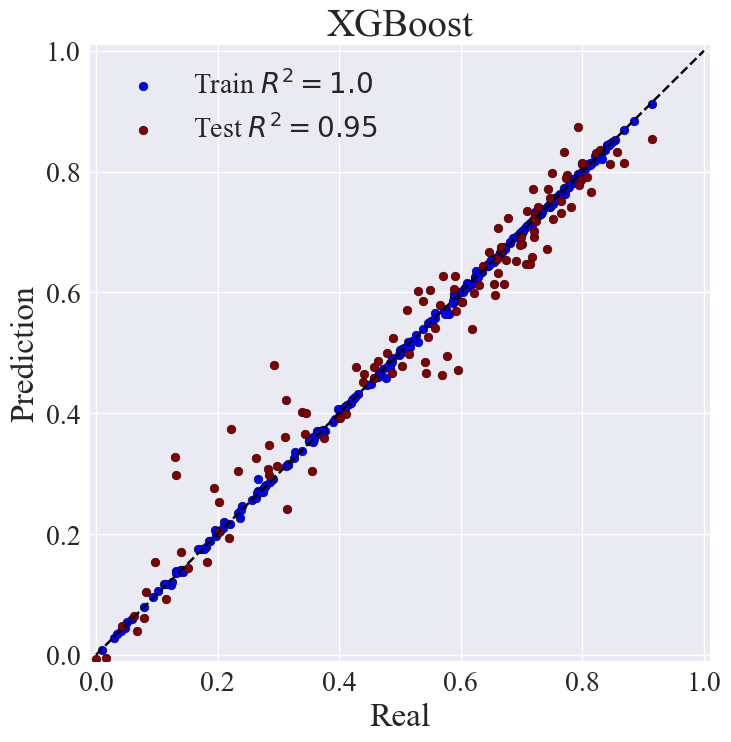

In [12]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, xgb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, xgb_train_pred_new), 2)}$", color="blue", edgecolor="k", s=40)
plt.scatter(y_test, xgb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, xgb_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=40)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("XGBoost", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 2 - ExtraTrees

In [14]:
etr_model = ExtraTreesRegressor()

etr_model.fit(X_train_scaled, y_train)


etr_test_pred = etr_model.predict(X_test_scaled)
etr_train_pred = etr_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, etr_test_pred), 3))
print(np.round(r2_score(y_train, etr_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, etr_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, etr_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, etr_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, etr_train_pred) * 100, 3))

====================r2 Score===================
0.837
1.0
======================Root Mean Squared Error=========================
9.494
0.0
======================Mean Absolute Error=========================
7.657
0.0


In [19]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical(["squared_error", "absolute_error", "friedman_mse", "poisson"], name='criterion'))
search_space.append(Categorical([True, False], name='bootstrap'))
search_space.append(Integer(1, 1000, name='n_estimators'))
search_space.append(Integer(1, 50, name='max_depth'))
search_space.append(Integer(2, 10, name='min_samples_split'))
search_space.append(Integer(1, 4, name='max_features'))


# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = ExtraTreesRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.006
Best Parameters: ['squared_error', False, 1000, 41, 2, 1]


In [13]:
etr_model_new = ExtraTreesRegressor(criterion="squared_error", bootstrap=False, n_estimators=1000, max_depth=41, min_samples_split=2, max_features=1)

etr_model_new.fit(X_train_scaled, y_train)


etr_test_pred_new = etr_model_new.predict(X_test_scaled)
etr_train_pred_new = etr_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, etr_test_pred_new), 3))
print(np.round(r2_score(y_train, etr_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, etr_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, etr_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, etr_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, etr_train_pred_new) * 100, 3))

====================r2 Score===================
0.873
1.0
======================Root Mean Squared Error=========================
8.385
0.0
======================Mean Absolute Error=========================
6.468
0.0


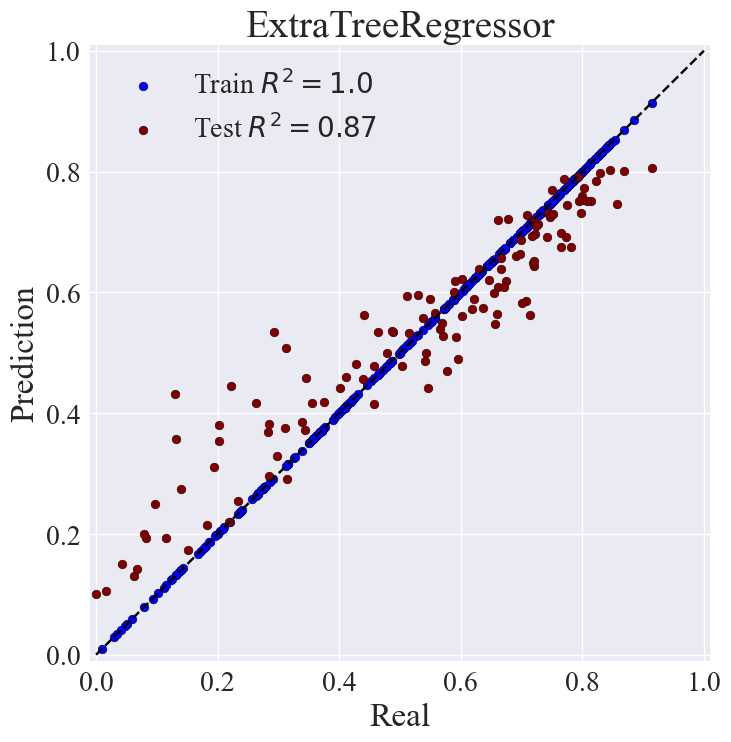

In [14]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, etr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, etr_train_pred_new), 2)}$", color="blue", edgecolor="k", s=40)
plt.scatter(y_test, etr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, etr_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=40)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("ExtraTreeRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 3 - Random Forest

In [11]:
rfr_model = RandomForestRegressor()

rfr_model.fit(X_train_scaled, y_train)


rfr_test_pred = rfr_model.predict(X_test_scaled)
rfr_train_pred = rfr_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, rfr_test_pred), 3))
print(np.round(r2_score(y_train, rfr_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, rfr_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, rfr_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, rfr_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, rfr_train_pred) * 100, 3))

====================r2 Score===================
0.892
0.983
======================Root Mean Squared Error=========================
7.724
2.942
======================Mean Absolute Error=========================
6.302
2.191


In [18]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Integer(1, 1000, name='n_estimators'))
search_space.append(Categorical(["squared_error", "friedman_mse", "absolute_error", "poisson"], name='criterion'))
search_space.append(Integer(1, 50, name='max_depth'))
search_space.append(Integer(2, 10, name='min_samples_split'))
search_space.append(Integer(1, 4, name='max_features'))
search_space.append(Categorical([True, False], name='bootstrap'))
search_space.append(Real(0, 1, name='ccp_alpha'))



# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = RandomForestRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.005
Best Parameters: [608, 'poisson', 39, 2, 1, False, 0.0]


In [15]:
rfr_model_new = RandomForestRegressor(n_estimators=608, criterion="poisson", max_depth=39, min_samples_split=2, max_features=1, 
                                      bootstrap=False, ccp_alpha=0)


rfr_model_new.fit(X_train_scaled, y_train)


rfr_test_pred_new = rfr_model_new.predict(X_test_scaled)
rfr_train_pred_new = rfr_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, rfr_test_pred_new), 3))
print(np.round(r2_score(y_train, rfr_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, rfr_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, rfr_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, rfr_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, rfr_train_pred_new) * 100, 3))

====================r2 Score===================
0.913
1.0
======================Root Mean Squared Error=========================
6.938
0.0
======================Mean Absolute Error=========================
5.604
0.0


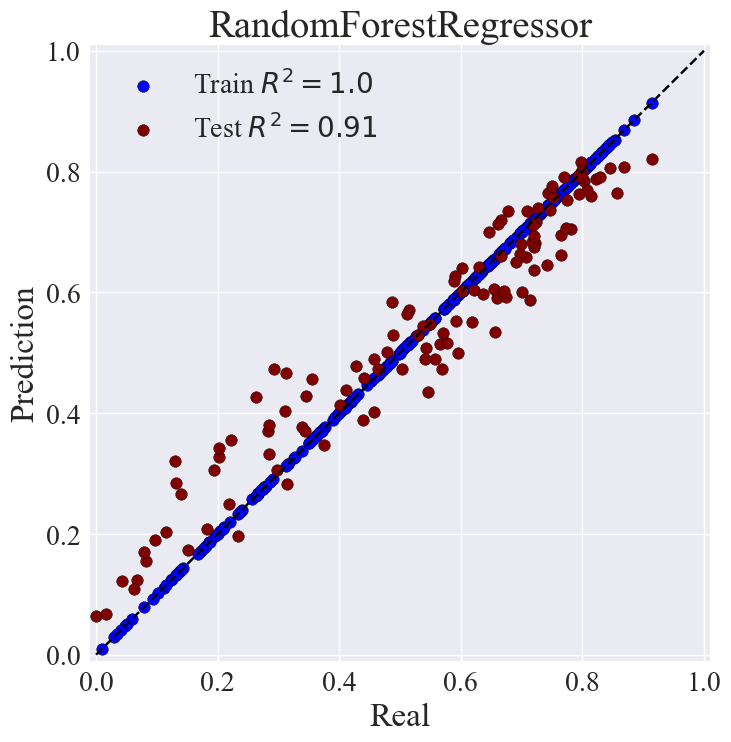

In [16]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, rfr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, rfr_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, rfr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, rfr_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("RandomForestRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 4 - AdaBoost

In [14]:
ada_model = AdaBoostRegressor()

ada_model.fit(X_train_scaled, y_train)


ada_test_pred = ada_model.predict(X_test_scaled)
ada_train_pred = ada_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, ada_test_pred), 3))
print(np.round(r2_score(y_train, ada_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, ada_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, ada_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, ada_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, ada_train_pred) * 100, 3))

====================r2 Score===================
0.79
0.832
======================Root Mean Squared Error=========================
10.799
9.175
======================Mean Absolute Error=========================
9.273
7.909


In [15]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Integer(1, 1000, name='n_estimators'))
search_space.append(Real(1e-6, 1, 'log-uniform', name='learning_rate'))
search_space.append(Categorical(["linear", "square", "exponential"], name='loss'))



# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = AdaBoostRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.009
Best Parameters: [980, 1.0, 'square']


In [17]:
ada_model_new = AdaBoostRegressor(n_estimators=980, learning_rate=1.0, loss="square")

ada_model_new.fit(X_train_scaled, y_train)


ada_test_pred_new = ada_model_new.predict(X_test_scaled)
ada_train_pred_new = ada_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, ada_test_pred_new), 3))
print(np.round(r2_score(y_train, ada_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, ada_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, ada_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, ada_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, ada_train_pred_new) * 100, 3))

====================r2 Score===================
0.834
0.855
======================Root Mean Squared Error=========================
9.579
8.516
======================Mean Absolute Error=========================
8.133
7.242


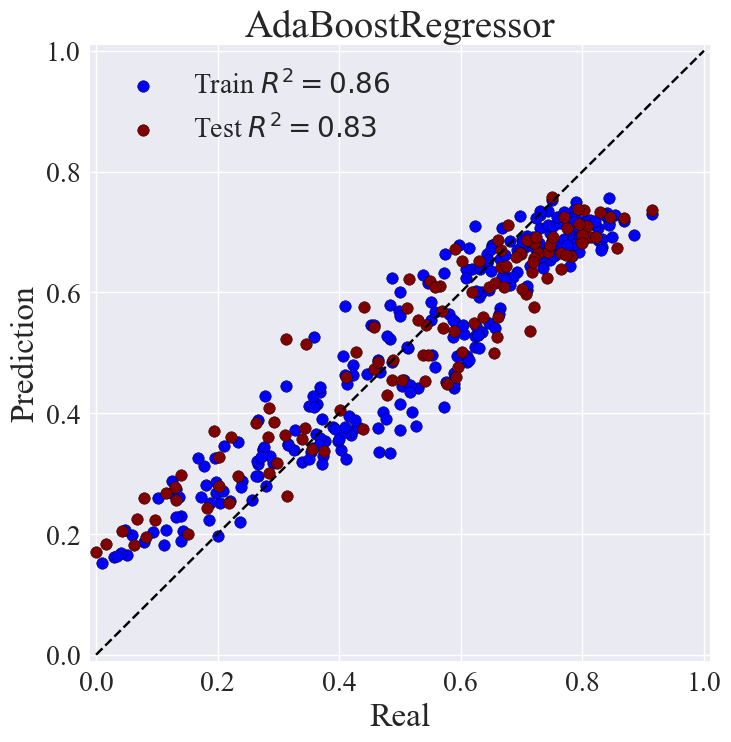

In [18]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, ada_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, ada_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, ada_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, ada_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("AdaBoostRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 5 - HistGradientBoosting

In [11]:
hgb_model = HistGradientBoostingRegressor()

hgb_model.fit(X_train_scaled, y_train)


hgb_test_pred = hgb_model.predict(X_test_scaled)
hgb_train_pred = hgb_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, hgb_test_pred), 3))
print(np.round(r2_score(y_train, hgb_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, hgb_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, hgb_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, hgb_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, hgb_train_pred) * 100, 3))

  File "C:\Users\ACER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


====================r2 Score===================
0.926
0.952
======================Root Mean Squared Error=========================
6.391
4.884
======================Mean Absolute Error=========================
5.075
3.799


In [14]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical(["squared_error", "gamma", "absolute_error", "poisson"], name='loss'))
search_space.append(Real(1e-6, 10, 'log-uniform', name='learning_rate'))
search_space.append(Integer(1, 1000, name='max_iter'))
search_space.append(Integer(1, 50, name='max_depth'))
search_space.append(Real(0, 1,  name='l2_regularization'))


# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = HistGradientBoostingRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.005
Best Parameters: ['gamma', 0.6541900068465281, 796, 44, 0.8528930782221644]


In [19]:
hgb_model_new = HistGradientBoostingRegressor(loss="gamma", learning_rate=0.6541900068465281, max_iter=796, 
                                      max_depth=44, l2_regularization=0.8528930782221644)

hgb_model_new.fit(X_train_scaled, y_train)


hgb_test_pred_new = hgb_model_new.predict(X_test_scaled)
hgb_train_pred_new = hgb_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, hgb_test_pred_new), 3))
print(np.round(r2_score(y_train, hgb_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, hgb_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, hgb_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, hgb_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, hgb_train_pred_new) * 100, 3))

  File "C:\Users\ACER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


====================r2 Score===================
0.933
0.994
======================Root Mean Squared Error=========================
6.115
1.668
======================Mean Absolute Error=========================
4.389
1.235


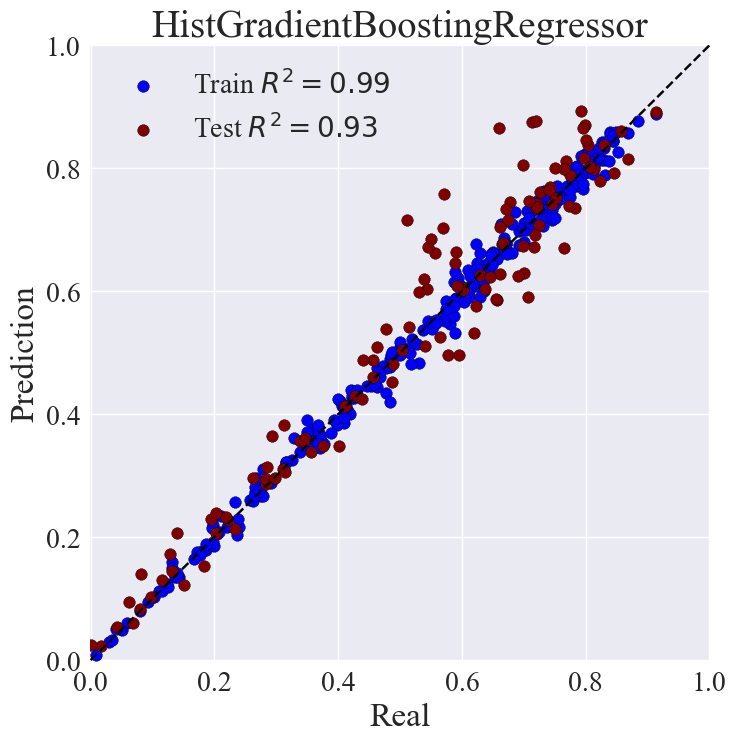

In [20]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, hgb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, hgb_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, hgb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, hgb_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("HistGradientBoostingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 6 - GradientBoosting

In [26]:
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train_scaled, y_train)


gbr_test_pred = gbr_model.predict(X_test_scaled)
gbr_train_pred = gbr_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, gbr_test_pred), 3))
print(np.round(r2_score(y_train, gbr_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, gbr_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, gbr_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, gbr_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, gbr_train_pred) * 100, 3))

====================r2 Score===================
0.931
0.957
======================Root Mean Squared Error=========================
6.168
4.621
======================Mean Absolute Error=========================
4.935
3.686


In [28]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical(["squared_error", "absolute_error", "huber", "quantile"], name='loss'))
search_space.append(Real(1e-6, 0.99, 'log-uniform', name='learning_rate'))
search_space.append(Integer(1, 1000, name='n_estimators'))
search_space.append(Real(1e-6, 0.99, 'log-uniform', name='subsample'))
search_space.append(Categorical(["friedman_mse", "squared_error"], name='criterion'))
search_space.append(Integer(2, 10, name='min_samples_split'))
search_space.append(Integer(1, 50, name='max_depth'))



# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = GradientBoostingRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.003
Best Parameters: ['absolute_error', 0.06241909221816817, 476, 0.32272137806567924, 'friedman_mse', 6, 46]


In [21]:
gbr_model_new = GradientBoostingRegressor(loss="absolute_error", learning_rate=0.06241909221816817, n_estimators=476, subsample=0.32272137806567924, 
                                 criterion="friedman_mse", min_samples_split=6, max_depth=46)

gbr_model_new.fit(X_train_scaled, y_train)


gbr_test_pred_new = gbr_model_new.predict(X_test_scaled)
gbr_train_pred_new = gbr_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, gbr_test_pred_new), 3))
print(np.round(r2_score(y_train, gbr_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, gbr_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, gbr_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, gbr_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, gbr_train_pred_new) * 100, 3))


====================r2 Score===================
0.953
0.992
======================Root Mean Squared Error=========================
5.131
2.048
======================Mean Absolute Error=========================
3.77
1.217


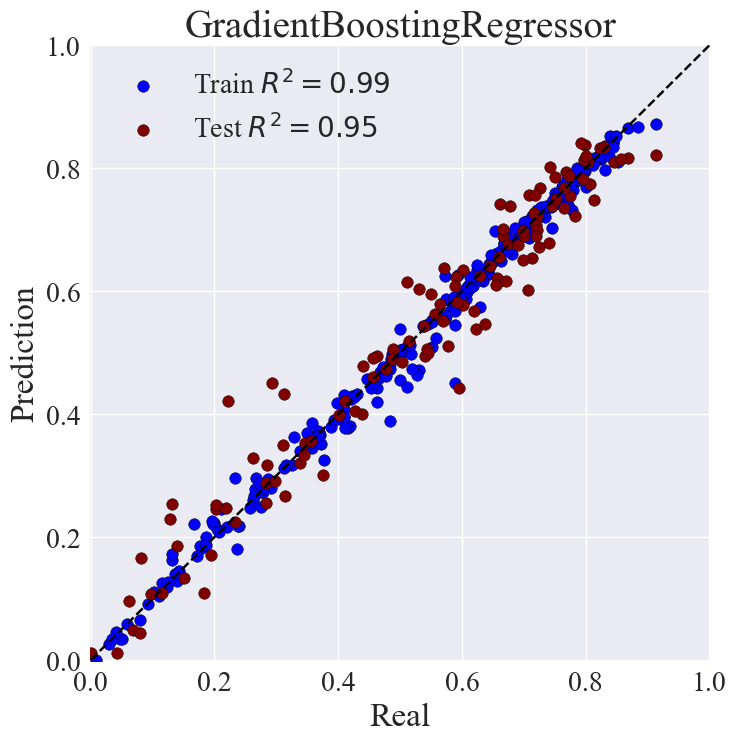

In [22]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, gbr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, gbr_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, gbr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, gbr_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("GradientBoostingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 7 - LightGBM

In [11]:
lgbm_model = LGBMRegressor(verbose=-1)

lgbm_model.fit(X_train_scaled, y_train)


lgbm_test_pred = lgbm_model.predict(X_test_scaled)
lgbm_train_pred = lgbm_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, lgbm_test_pred), 3))
print(np.round(r2_score(y_train, lgbm_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, lgbm_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, lgbm_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, lgbm_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, lgbm_train_pred) * 100, 3))

  File "C:\Users\ACER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


====================r2 Score===================
0.926
0.952
======================Root Mean Squared Error=========================
6.391
4.884
======================Mean Absolute Error=========================
5.075
3.799


In [12]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical(["gbdt", "dart", "goss"], name='boosting'))
search_space.append(Real(1e-6, 1, 'log-uniform', name='learning_rate'))
search_space.append(Integer(1, 1000, name='n_estimators'))
search_space.append(Real(1e-6, 1, 'log-uniform', name='subsample'))
search_space.append(Real(1e-6, 1, 'log-uniform', name='feature_fraction'))
search_space.append(Integer(1, 50, name='n_leaves'))
search_space.append(Integer(1, 50, name='max_depth'))


# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = LGBMRegressor(verbose=-1)
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.003
Best Parameters: ['dart', 0.5092675895768605, 855, 1e-06, 1.0, 20, 50]


In [23]:
lgbm_model_new = LGBMRegressor(boosting="dart", learning_rate=0.5092675895768605, n_estimators=855, subsample=1e-06, 
                      feature_fraction=1.0, n_leaves=20, max_depth=50, verbose=-1)

lgbm_model_new.fit(X_train_scaled, y_train)


lgbm_test_pred_new = lgbm_model_new.predict(X_test_scaled)
lgbm_train_pred_new = lgbm_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, lgbm_test_pred_new), 3))
print(np.round(r2_score(y_train, lgbm_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, lgbm_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, lgbm_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, lgbm_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, lgbm_train_pred_new) * 100, 3))

====================r2 Score===================
0.961
0.99
======================Root Mean Squared Error=========================
4.663
2.235
======================Mean Absolute Error=========================
3.667
1.669


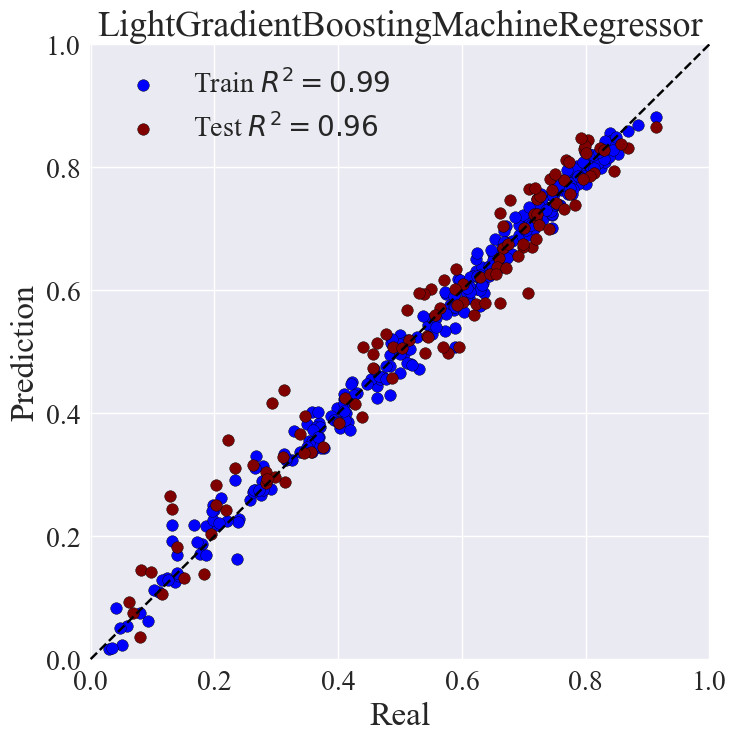

In [24]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, lgbm_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, lgbm_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, lgbm_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, lgbm_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("LightGradientBoostingMachineRegressor", fontname="Times New Roman", fontsize=26)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 8 - CatBoost

In [35]:
# define the space of hyperparameters to search
search_space = list()

search_space.append(Real(1e-6, 1, 'log-uniform', name='learning_rate'))
search_space.append(Integer(1, 1000, name='iterations'))
# search_space.append(Real(1e-6, 1, 'log-uniform', name='l2_leaf_reg'))
# search_space.append(Real(1e-6, 1, 'log-uniform', name='bagging_temperature'))
# search_space.append(Integer(1, 15, name='depth'))



# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = CatBoostRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.002
Best Parameters: [0.15398886238542636, 781]


In [25]:
catb_model_new = CatBoostRegressor(iterations=781, learning_rate=0.15398886238542636)

catb_model_new.fit(X_train_scaled, y_train)


catb_test_pred_new = catb_model_new.predict(X_test_scaled)
catb_train_pred_new = catb_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, catb_test_pred_new), 3))
print(np.round(r2_score(y_train, catb_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, catb_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, catb_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, catb_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, catb_train_pred_new) * 100, 3))

0:	learn: 0.2061148	total: 193ms	remaining: 2m 30s
1:	learn: 0.1892228	total: 194ms	remaining: 1m 15s
2:	learn: 0.1743380	total: 194ms	remaining: 50.3s
3:	learn: 0.1636236	total: 194ms	remaining: 37.7s
4:	learn: 0.1524446	total: 195ms	remaining: 30.2s
5:	learn: 0.1416809	total: 195ms	remaining: 25.2s
6:	learn: 0.1318825	total: 195ms	remaining: 21.6s
7:	learn: 0.1244767	total: 196ms	remaining: 18.9s
8:	learn: 0.1173134	total: 196ms	remaining: 16.8s
9:	learn: 0.1119963	total: 196ms	remaining: 15.1s
10:	learn: 0.1054474	total: 197ms	remaining: 13.8s
11:	learn: 0.1001678	total: 197ms	remaining: 12.6s
12:	learn: 0.0972889	total: 197ms	remaining: 11.7s
13:	learn: 0.0957072	total: 198ms	remaining: 10.8s
14:	learn: 0.0906609	total: 198ms	remaining: 10.1s
15:	learn: 0.0855603	total: 198ms	remaining: 9.49s
16:	learn: 0.0816907	total: 199ms	remaining: 8.93s
17:	learn: 0.0782659	total: 199ms	remaining: 8.44s
18:	learn: 0.0741449	total: 200ms	remaining: 8s
19:	learn: 0.0716642	total: 200ms	remainin

381:	learn: 0.0061731	total: 353ms	remaining: 369ms
382:	learn: 0.0061552	total: 354ms	remaining: 368ms
383:	learn: 0.0061381	total: 355ms	remaining: 367ms
384:	learn: 0.0061082	total: 355ms	remaining: 365ms
385:	learn: 0.0060927	total: 356ms	remaining: 364ms
386:	learn: 0.0060829	total: 356ms	remaining: 363ms
387:	learn: 0.0060715	total: 358ms	remaining: 363ms
388:	learn: 0.0060639	total: 359ms	remaining: 362ms
389:	learn: 0.0060550	total: 360ms	remaining: 361ms
390:	learn: 0.0060405	total: 360ms	remaining: 359ms
391:	learn: 0.0060272	total: 361ms	remaining: 358ms
392:	learn: 0.0060109	total: 362ms	remaining: 357ms
393:	learn: 0.0059945	total: 362ms	remaining: 356ms
394:	learn: 0.0059784	total: 363ms	remaining: 355ms
395:	learn: 0.0059691	total: 364ms	remaining: 353ms
396:	learn: 0.0059568	total: 364ms	remaining: 352ms
397:	learn: 0.0059201	total: 365ms	remaining: 351ms
398:	learn: 0.0059072	total: 366ms	remaining: 350ms
399:	learn: 0.0058906	total: 366ms	remaining: 349ms
400:	learn: 

718:	learn: 0.0028321	total: 504ms	remaining: 43.4ms
719:	learn: 0.0028286	total: 504ms	remaining: 42.7ms
720:	learn: 0.0028239	total: 505ms	remaining: 42ms
721:	learn: 0.0028165	total: 505ms	remaining: 41.3ms
722:	learn: 0.0028131	total: 506ms	remaining: 40.6ms
723:	learn: 0.0028077	total: 506ms	remaining: 39.8ms
724:	learn: 0.0028003	total: 506ms	remaining: 39.1ms
725:	learn: 0.0027960	total: 507ms	remaining: 38.4ms
726:	learn: 0.0027883	total: 507ms	remaining: 37.7ms
727:	learn: 0.0027813	total: 508ms	remaining: 37ms
728:	learn: 0.0027735	total: 508ms	remaining: 36.3ms
729:	learn: 0.0027690	total: 509ms	remaining: 35.5ms
730:	learn: 0.0027636	total: 509ms	remaining: 34.8ms
731:	learn: 0.0027588	total: 510ms	remaining: 34.1ms
732:	learn: 0.0027519	total: 510ms	remaining: 33.4ms
733:	learn: 0.0027454	total: 510ms	remaining: 32.7ms
734:	learn: 0.0027392	total: 511ms	remaining: 32ms
735:	learn: 0.0027327	total: 511ms	remaining: 31.3ms
736:	learn: 0.0027284	total: 512ms	remaining: 30.5ms

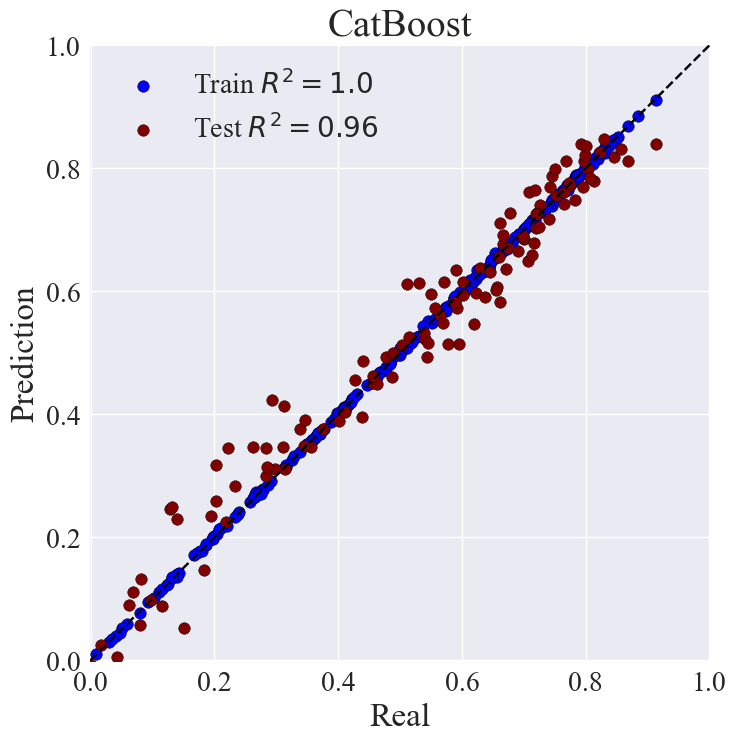

In [26]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, catb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, catb_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, catb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, catb_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("CatBoost", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# 9 - Bagging

In [17]:
bag_model = BaggingRegressor()

bag_model.fit(X_train_scaled, y_train)


bag_test_pred = bag_model.predict(X_test_scaled)
bag_train_pred = bag_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, bag_test_pred), 3))
print(np.round(r2_score(y_train, bag_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, bag_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, bag_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, bag_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, bag_train_pred) * 100, 3))

====================r2 Score===================
0.874
0.97
======================Root Mean Squared Error=========================
8.344
3.874
======================Mean Absolute Error=========================
6.621
2.713


In [23]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical([True, False], name='bootstrap'))
search_space.append(Integer(1, 1000, name='n_estimators'))
# search_space.append(Integer(10, 260, name='max_samples'))
search_space.append(Integer(1, 4, name='max_features'))


# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = BaggingRegressor()
	model.set_params(**params)
	# define test harness
	cv = RepeatedKFold(n_splits=10, random_state=42)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_train_scaled, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
	# calculate the mean of the scores
	estimate = np.mean(result)
	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

Best Accuracy: -0.006
Best Parameters: [True, 971, 4]


In [27]:
bag_model_new = BaggingRegressor(bootstrap=True, n_estimators=971, max_features=4)

bag_model_new.fit(X_train_scaled, y_train)


bag_test_pred_new = bag_model_new.predict(X_test_scaled)
bag_train_pred_new = bag_model_new.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, bag_test_pred_new), 3))
print(np.round(r2_score(y_train, bag_train_pred_new), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, bag_test_pred_new, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, bag_train_pred_new, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, bag_test_pred_new) * 100, 3))
print(np.round(mean_absolute_error(y_train, bag_train_pred_new) * 100, 3))

====================r2 Score===================
0.896
0.984
======================Root Mean Squared Error=========================
7.578
2.857
======================Mean Absolute Error=========================
6.163
2.145


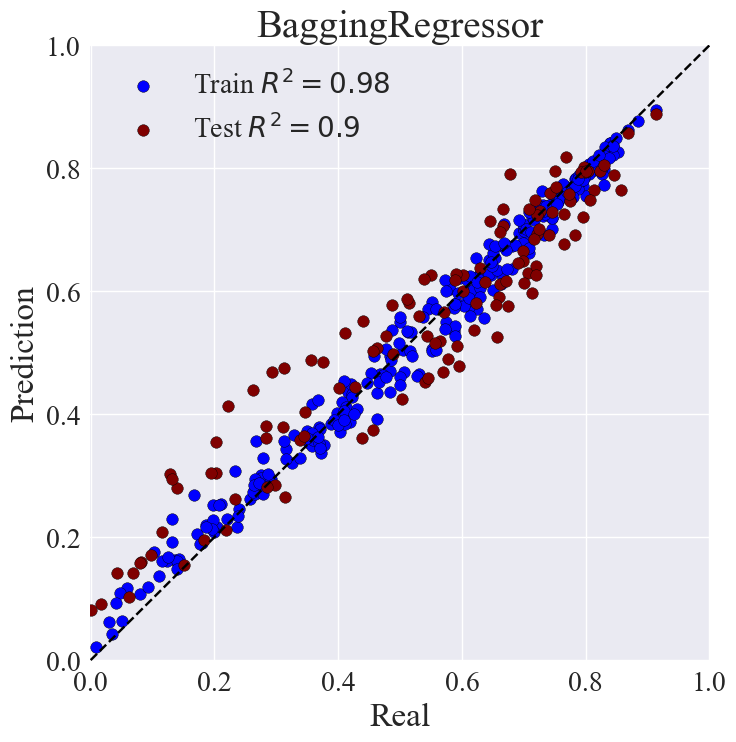

In [28]:
plt.figure(figsize=(8, 8))
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, bag_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, bag_train_pred_new), 2)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, bag_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, bag_test_pred_new), 2)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("BaggingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})

# Gathering All The Results

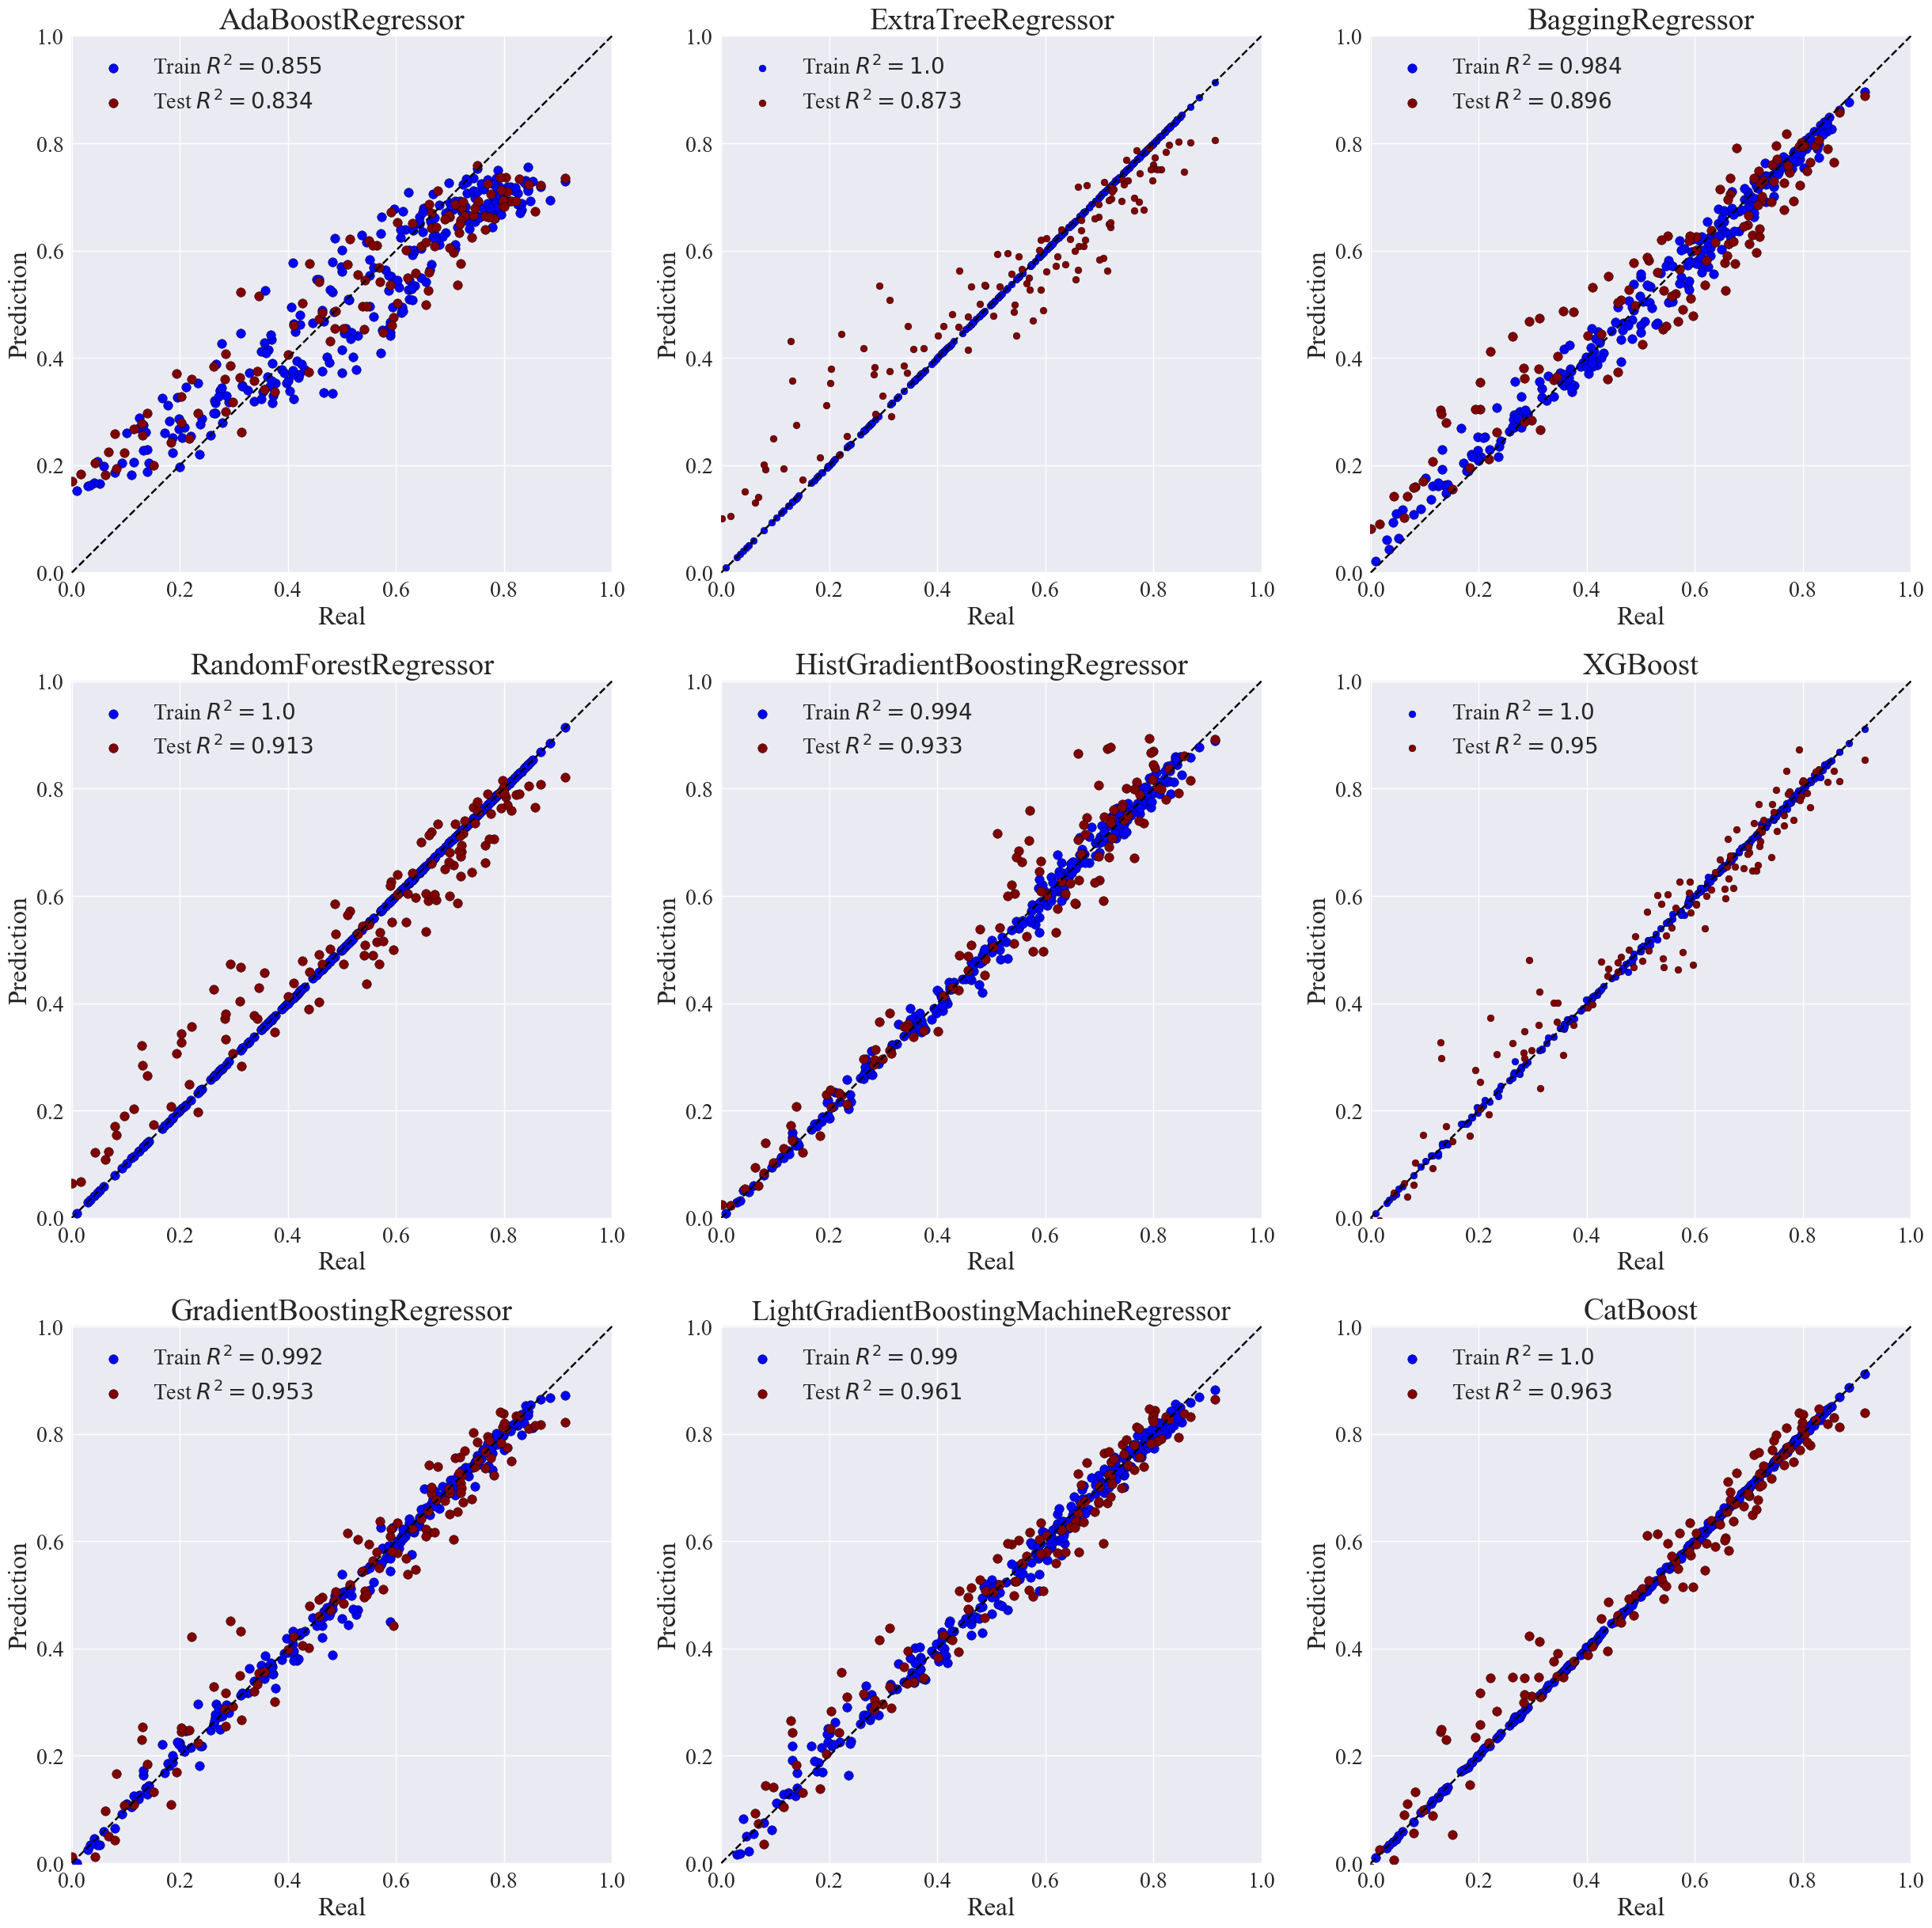

In [33]:
plt.figure(figsize=(30,30))

# AdaBoost
plt.subplot(3, 3, 1)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, ada_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, ada_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, ada_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, ada_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("AdaBoostRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})



plt.subplot(3, 3, 2)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, etr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, etr_train_pred_new), 3)}$", color="blue", edgecolor="k", s=40)
plt.scatter(y_test, etr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, etr_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=40)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("ExtraTreeRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})


plt.subplot(3, 3, 3)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, bag_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, bag_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, bag_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, bag_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("BaggingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})


plt.subplot(3, 3, 4)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, rfr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, rfr_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, rfr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, rfr_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("RandomForestRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})


plt.subplot(3, 3, 5)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, hgb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, hgb_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, hgb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, hgb_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("HistGradientBoostingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})



plt.subplot(3, 3, 6)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, xgb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, xgb_train_pred_new), 3)}$", color="blue", edgecolor="k", s=40)
plt.scatter(y_test, xgb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, xgb_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=40)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("XGBoost", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})


plt.subplot(3, 3, 7)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, gbr_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, gbr_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, gbr_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, gbr_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("GradientBoostingRegressor", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})



plt.subplot(3, 3, 8)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, lgbm_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, lgbm_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, lgbm_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, lgbm_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("LightGradientBoostingMachineRegressor", fontname="Times New Roman", fontsize=26)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})



plt.subplot(3, 3, 9)
plt.plot((0, 1), (0, 1), linestyle="--", color="k")
plt.scatter(y_train, catb_train_pred_new, label=f"Train $R^2 = {np.round(r2_score(y_train, catb_train_pred_new), 3)}$", color="blue", edgecolor="k", s=70)
plt.scatter(y_test, catb_test_pred_new, label=f"Test $R^2 = {np.round(r2_score(y_test, catb_test_pred_new), 3)}$", color="maroon", edgecolor="k", s=70)
plt.xlabel("Real", fontsize=24)
plt.ylabel("Prediction", fontsize=24)
plt.title("CatBoost", fontname="Times New Roman", fontsize=28)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontname="Times New Roman", fontsize=20)
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.legend(prop={'family':"Times New Roman", 'size':20})


plt.savefig("R2_Plot.jpg", bbox_inches = 'tight', dpi=700);

# Error Curves

# RMSE

In [34]:
test_precisions = np.array([[np.round(r2_score(y_test, ada_test_pred_new), 3), 
                             np.round(r2_score(y_test, etr_test_pred_new), 3), 
                             np.round(r2_score(y_test, bag_test_pred_new), 3),
                             np.round(r2_score(y_test, rfr_test_pred_new), 3),
                             np.round(r2_score(y_test, hgb_test_pred_new), 3), 
                             np.round(r2_score(y_test, xgb_test_pred_new), 3), 
                             np.round(r2_score(y_test, gbr_test_pred_new), 3), 
                             np.round(r2_score(y_test, lgbm_test_pred_new), 3),
                             np.round(r2_score(y_test, catb_test_pred_new), 3)],
                     
                            [np.round(mean_squared_error(y_test, ada_test_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_test, etr_test_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_test, bag_test_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_test, rfr_test_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_test, hgb_test_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_test, xgb_test_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_test, gbr_test_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_test, lgbm_test_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_test, catb_test_pred_new, squared=False) * 100, 3)],
                     
                            [np.round(mean_absolute_error(y_test, ada_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, etr_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, bag_test_pred_new) * 100, 3),
                             np.round(mean_absolute_error(y_test, rfr_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, hgb_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, xgb_test_pred_new) * 100, 3),
                             np.round(mean_absolute_error(y_test, gbr_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, lgbm_test_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_test, catb_test_pred_new) * 100, 3)]])

In [35]:
test_precisions = pd.DataFrame(test_precisions, columns=
                               ["AdaBoost", "ExtraTrees", "Bagging", "RandomForest", "HistGradientBoosting", "XGBoost", "GradientBoosting", "LGBM", "CatBoost"])

In [36]:
test_precisions

,AdaBoost,ExtraTrees,Bagging,RandomForest,HistGradientBoosting,XGBoost,GradientBoosting,LGBM,CatBoost
0,0.834,0.873,0.896,0.913,0.933,0.950,0.953,0.961,0.963
1,9.579,8.385,7.578,6.938,6.115,5.262,5.131,4.663,4.541
2,8.133,6.468,6.163,5.604,4.389,3.853,3.770,3.667,3.425


In [37]:
test_precisions.rename(index={0:"$R^2$", 1:"RMSE", 2:"MAE"}, inplace=True)

# Train Precisions

In [38]:
train_precisions = np.array([[np.round(r2_score(y_train, ada_train_pred_new), 3), 
                             np.round(r2_score(y_train, etr_train_pred_new), 3), 
                             np.round(r2_score(y_train, bag_train_pred_new), 3),
                             np.round(r2_score(y_train, rfr_train_pred_new), 3),
                             np.round(r2_score(y_train, hgb_train_pred_new), 3), 
                             np.round(r2_score(y_train, xgb_train_pred_new), 3), 
                             np.round(r2_score(y_train, gbr_train_pred_new), 3), 
                             np.round(r2_score(y_train, lgbm_train_pred_new), 3),
                             np.round(r2_score(y_train, catb_train_pred_new), 3)],
                     
                            [np.round(mean_squared_error(y_train, ada_train_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_train, etr_train_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_train, bag_train_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_train, rfr_train_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_train, hgb_train_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_train, xgb_train_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_train, gbr_train_pred_new, squared=False) * 100, 3),
                             np.round(mean_squared_error(y_train, lgbm_train_pred_new, squared=False) * 100, 3), 
                             np.round(mean_squared_error(y_train, catb_train_pred_new, squared=False) * 100, 3)],
                     
                            [np.round(mean_absolute_error(y_train, ada_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, etr_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, bag_train_pred_new) * 100, 3),
                             np.round(mean_absolute_error(y_train, rfr_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, hgb_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, xgb_train_pred_new) * 100, 3),
                             np.round(mean_absolute_error(y_train, gbr_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, lgbm_train_pred_new) * 100, 3), 
                             np.round(mean_absolute_error(y_train, catb_train_pred_new) * 100, 3)]])

In [39]:
train_precisions = pd.DataFrame(train_precisions, columns=
                                ["AdaBoost", "ExtraTrees", "Bagging", "RandomForest", "HistGradientBoosting", "XGBoost", "GradientBoosting", "LGBM", "CatBoost"])

In [40]:
train_precisions.rename(index={0:"$R^2$", 1:"RMSE", 2:"MAE"}, inplace=True)

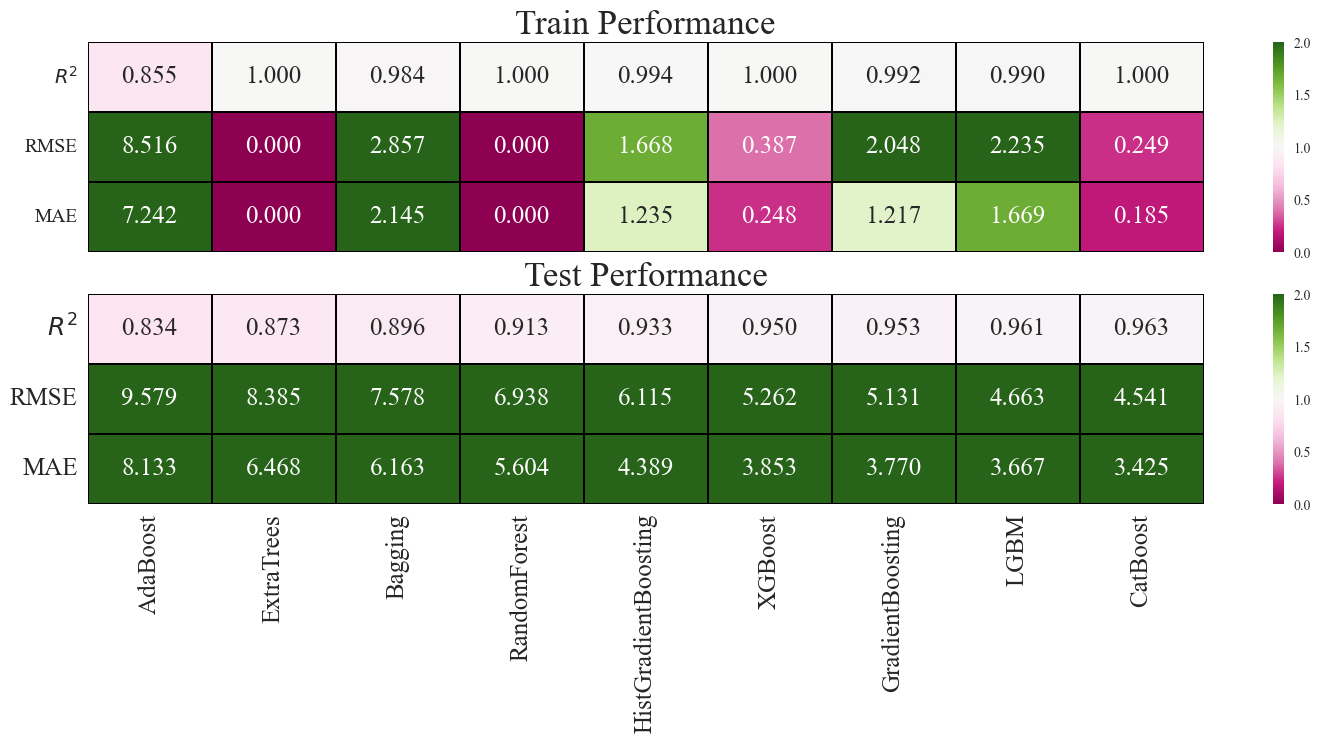

In [49]:
plt.figure(figsize=(18, 6))
mask = np.triu(np.ones_like(test_precisions))
plt.subplot(2, 1, 1)
sns.heatmap(train_precisions, vmin=0, vmax=2, fmt='.3f',
            linewidths=0.3, annot=True, annot_kws={"size":18, "font":"Times New Roman"}, cmap="PiYG", linecolor="black")

plt.yticks(rotation = 0, fontsize = "14", va = "center");
plt.xticks([]);
plt.title("Train Performance", fontsize=25)


plt.subplot(2, 1, 2)
sns.heatmap(test_precisions, vmin=0, vmax=2, fmt='.3f',
            linewidths=0.3, annot=True, annot_kws={"size":18, "font":"Times New Roman"}, cmap="PiYG", linecolor="black")


plt.yticks(rotation = 0, fontsize = "18", va = "center");
plt.xticks(rotation= 90, fontsize = "18");
plt.title("Test Performance", fontsize=25)


plt.savefig("R2-RMSE-MAE HeatMap.jpg", bbox_inches = 'tight', dpi=800);